### Component Comparison (mu)

In [8]:
# Python imports

import os
import sys
import copy
import logging
import time
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.data.datahandler import DataHandler
from src.model.base_nmf import BaseSearch
from tests.factor_comparison import FactorComp
from src.utils import calculate_Q

In [9]:
# Input data and uncertainty files for the Baton Rouge dataset from PMF5

input_file = os.path.join("D:\\", "projects", "nmf_py", "data", "Dataset-BatonRouge-con.csv")
uncertainty_file = os.path.join("D:\\", "projects", "nmf_py", "data", "Dataset-BatonRouge-unc.csv")

In [10]:
# Load data files and calculate statistics
# Category is defaulted to 'Strong' and has not been integrated into the NMF workflow.

dh = DataHandler(
        input_path=input_file,
        uncertainty_path=uncertainty_file,
        output_path=None,
        index_col='Date'
    )

08-Mar-23 14:59:05 - Input and output configured successfully


In [11]:
# Base model paramters

min_components = 2            # min number of factors to compare
max_components = 9


In [14]:
results_data = []
output_path = os.path.join("D:\\", "projects", "nmf_py", "data", "factor_test")
columns = None


for n_components in range(min_components, max_components+1):
    comparison_file = f"br{n_components}f_profiling_results.json"
    results_file = os.path.join(output_path, comparison_file)
    with open(results_file) as file:
        file_results = json.load(file)
        columns = file_results.keys()
        results_data.append(file_results)
results = pd.DataFrame(results_data, columns=columns)
results

,factors,nmf-Q,pmf-Q,R2 Avg
0,2,176985.546875,126461.562500,0.989425
1,3,149330.656250,100209.218750,0.986994
2,4,126181.171875,86895.687500,0.990763
3,5,93201.062500,74038.875000,0.980793
4,6,90194.625000,64509.929688,0.986398
5,7,83494.906250,56798.777344,0.981930
6,8,66063.320312,50683.796875,0.983187
7,9,64106.144531,44813.910156,0.938609


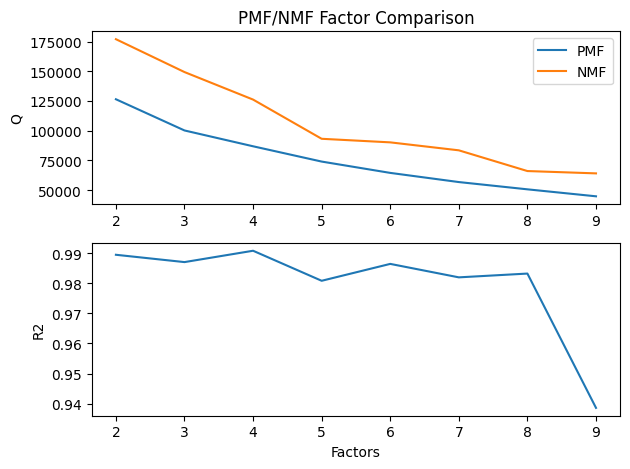

In [22]:
import warnings
warnings.filterwarnings('ignore')
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

fig, axs = plt.subplots(2, 1)
axs[0].plot(results["factors"], results["pmf-Q"], label="PMF")
axs[0].plot(results["factors"], results["nmf-Q"], label="NMF")
axs[1].plot(results["factors"], results["R2 Avg"])
axs[1].set_xlabel("Factors")
axs[0].set_ylabel("Q")
axs[1].set_ylabel("R2")
axs[0].legend()
axs[0].set_title("PMF/NMF Factor Comparison")
fig.tight_layout()

plt.show()